---
title: "Exploratory Data Analysis"
format:
    html: 
        code-fold: false
---

# Introduction and Motivation

Political misinformation and disinformation have become significant challenges in today's digital age, potentially threatening democratic processes and public discourse. This analysis examines three key datasets to understand patterns in political statements and news coverage:

- The `LIAR` dataset containing fact-checked political statements
- `MediaCloud API` data providing news articles from various media outlets
- `News API` data offering recent political news coverage

# Overview of Methods

The analysis employs several approaches to examine these datasets:

1. **Statistical Analysis**
    - Distribution of truth labels in fact-checked statements
    - Temporal patterns in news coverage
    - Source analysis of news articles

2. **Text Analysis**
    - Word count distributions
    - Word clouds to visualize common themes
    - Statement length analysis

3. **Visualization**
    - Distribution plots of key variables
    - Time series analysis of publication patterns
    - Categorical data visualization

# Code 

## LIAR Dataset

           ID        Label                                          Statement  \
0   2635.json        false  Says the Annies List political group supports ...   
1  10540.json    half-true  When did the decline of coal start? It started...   
2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json        false  Health care reform legislation is likely to ma...   
4   9028.json    half-true  The economic turnaround started at the end of ...   

                             Subjects         Speaker             Job_Title  \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    blog-posting                   NaN   
4                        economy,jobs   charlie-crist                   NaN   

  State_Info       Party  Barely_True_

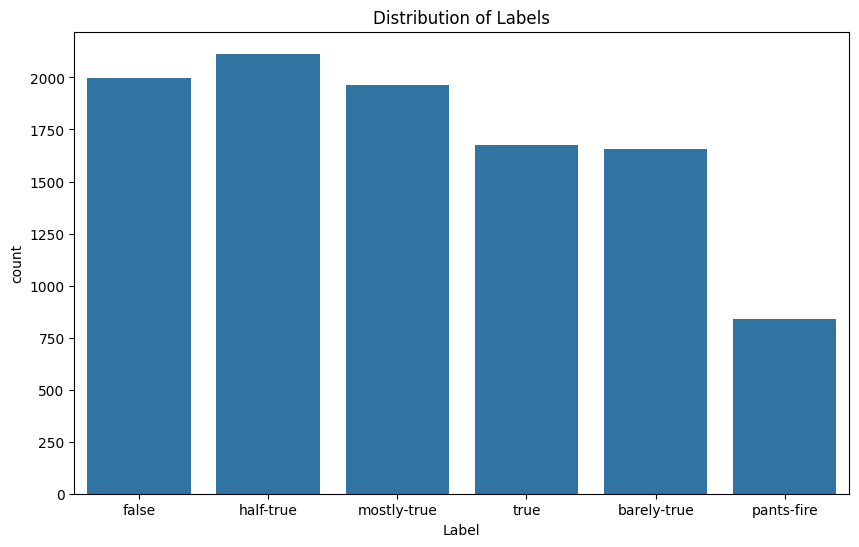

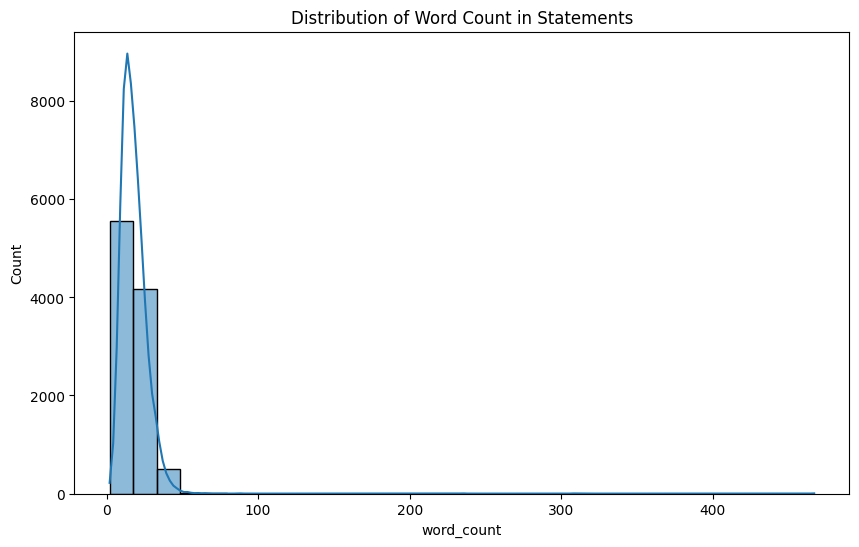

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../../data/Clean_Data/liar_dataset/train.csv'
liar_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(liar_df.head())

# Display basic information about the dataset
print(liar_df.info())

# Display summary statistics of the dataset
print(liar_df.describe())

# Check for missing values
print(liar_df.isnull().sum())

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=liar_df)
plt.title('Distribution of Labels')
plt.show()

# Plot the distribution of the word count in statements
liar_df['word_count'] = liar_df['Statement'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(liar_df['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Count in Statements')
plt.show()

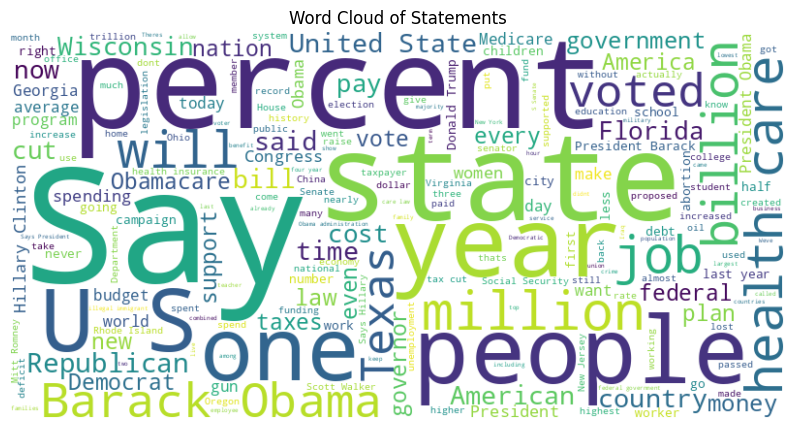

In [3]:
from wordcloud import WordCloud

# Combine all statements into a single string
text = ' '.join(liar_df['Statement'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Statements')
plt.show()

## MediaCloud API Data

In [6]:
# Load the dataset
file_path = '../../data/Clean_Data/mediacloud_api_data/politics-storylist-20231129_20231130.csv'
mc_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(mc_df.head())

# Display basic information about the dataset
print(mc_df.info())

# Display summary statistics of the dataset
print(mc_df.describe())

# Check for missing values
print(mc_df.isnull().sum())

                                                  id publish_date  \
0  7e06a4550edbe6821abfff04cf9bbbf7ea6523f778cafc...   2023-11-30   
1  9539e8b50a475270c67736b536205ae460feca342a875b...   2023-11-29   
2  9e4c35528bd0401beafa6b3daa58f55d2603dfdf737cc1...   2023-11-30   
3  65b94f2969eb37896b58ecf9d8735949b82062e323b331...   2023-11-29   
4  37e077ba3c89f3b590622fd6afb99e66bcab607526f17d...   2023-11-29   

                                               title  \
0  President Biden Is Sharpening His Attacks On F...   
1  The GOP Is Having An Identity Crisis Over Amer...   
2  The Downballot: Should Democrats freak out ove...   
3  Senate panel approves former Maryland Gov. Mar...   
4  'Our eyes are open': Mary Trump calls out 'MAG...   

                                                 url language  \
0  https://www.npr.org/2023/11/30/1197958301/npr-...       en   
1  https://www.npr.org/2023/11/29/1197958272/npr-...       en   
2  https://www.dailykos.com/stories/2023/11/30/22... 

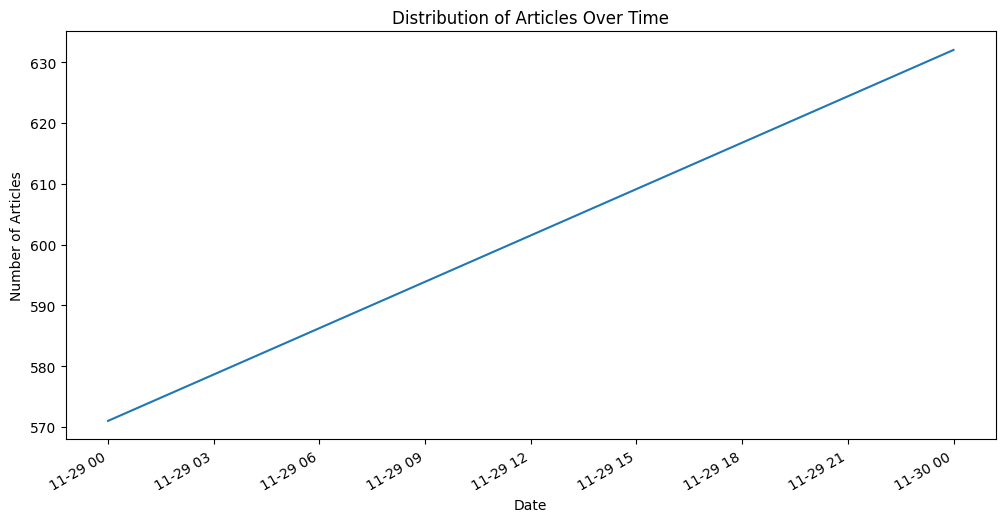

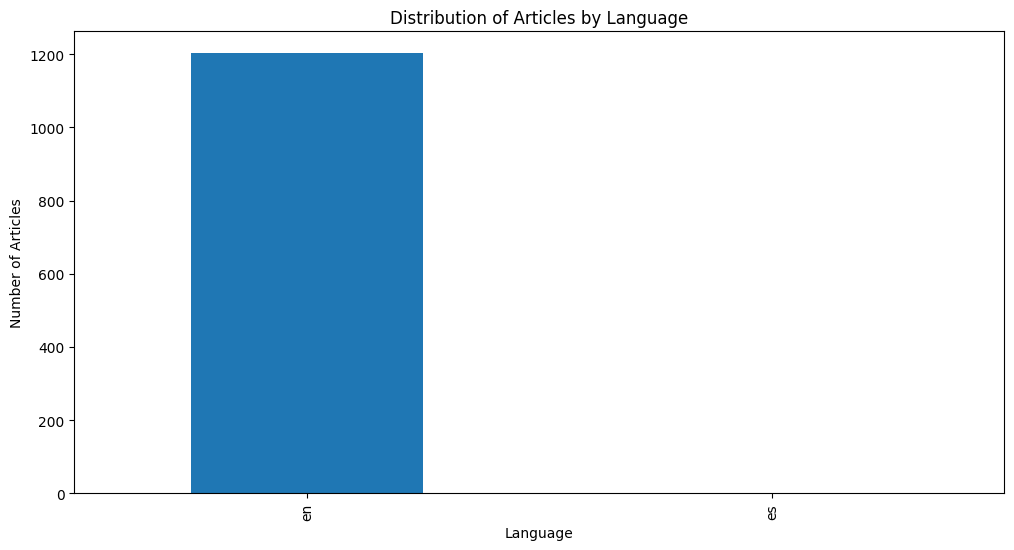

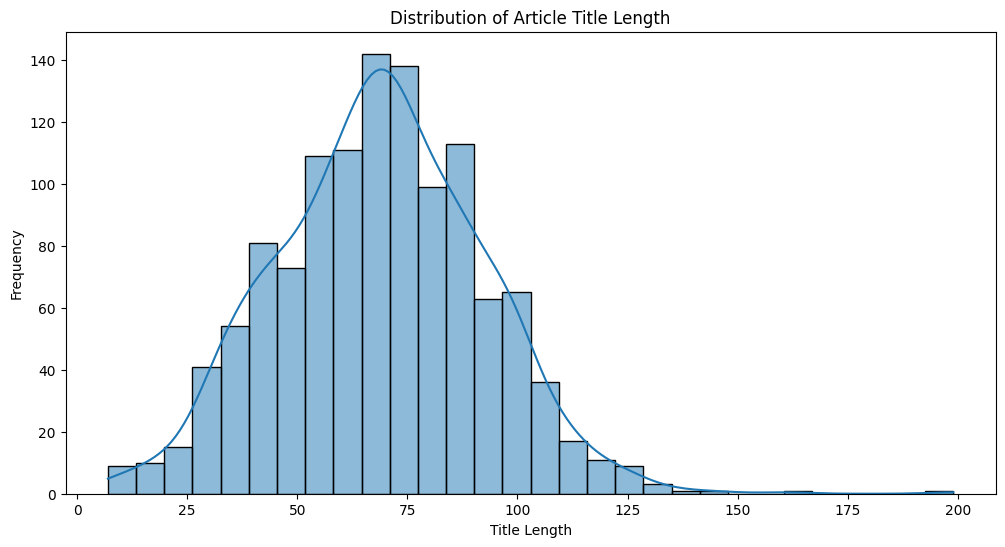

In [10]:
# Display the distribution of articles by media_name
plt.figure(figsize=(12, 6))
mc_df['publish_date'].value_counts().sort_index().plot(kind='line')
plt.title('Distribution of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

# Display the distribution of articles by language
plt.figure(figsize=(12, 6))
mc_df['language'].value_counts().plot(kind='bar')
plt.title('Distribution of Articles by Language')
plt.xlabel('Language')
plt.ylabel('Number of Articles')
plt.show()

# Display the distribution of article titles length
mc_df['title_length'] = mc_df['title'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(mc_df['title_length'], bins=30, kde=True)
plt.title('Distribution of Article Title Length')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

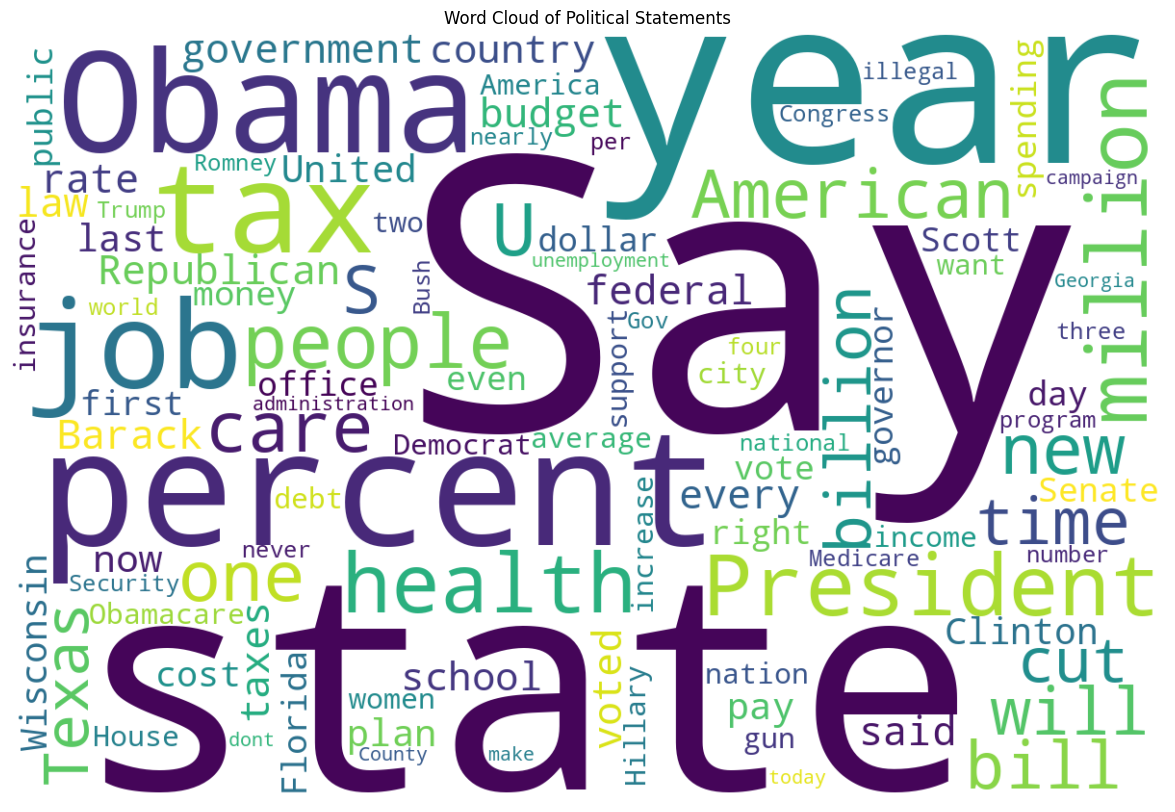

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all statements into a single string
text = ' '.join(liar_df['Statement'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(
    width=1200, 
    height=800,
    background_color='white',
    max_words=100,
    collocations=False
).generate(text)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Political Statements')
plt.show()

## News API Data

In [6]:
# Load the dataset
file_path = '../../data/Clean_Data/news_api_data/news_api_data.csv'
news_df  = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(news_df .head())

# Display basic information about the dataset
print(news_df .info())

# Display summary statistics of the dataset
print(news_df .describe())

# Check for missing values
print(news_df .isnull().sum())

             Source               Author  \
0               NPR         Kirk Siegler   
1      Fast Company  Chris Stokel-Walker   
2          BBC News                  NaN   
3          BBC News                  NaN   
4  Business Insider        Madeline Berg   

                                               Title  \
0  Trump picks North Dakota Gov. Doug Burgum to l...   
1  How long will Elon Musk and Donald Trump’s lov...   
2  How US election fraud claims changed as Trump won   
3  Meet the DIY group for men fixing loneliness a...   
4  Sam Altman is getting into the transition team...   

                                         Description  \
0  Burgum ran in the 2024 Republican presidential...   
1  Two massive egos and two idiosyncratic entrepr...   
2  Both Trump fans and Harris supporters baseless...   
3  Group that focuses on DIY projects is oversubs...   
4  OpenAI CEO Sam Altman has been chosen to cocha...   

                                                 URL  Post_Ye

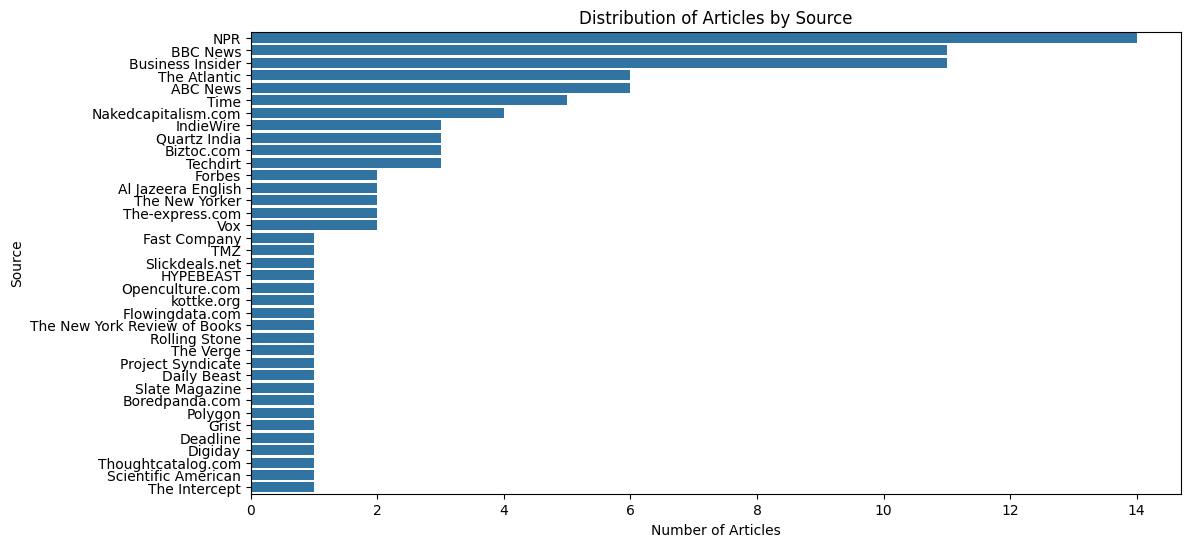

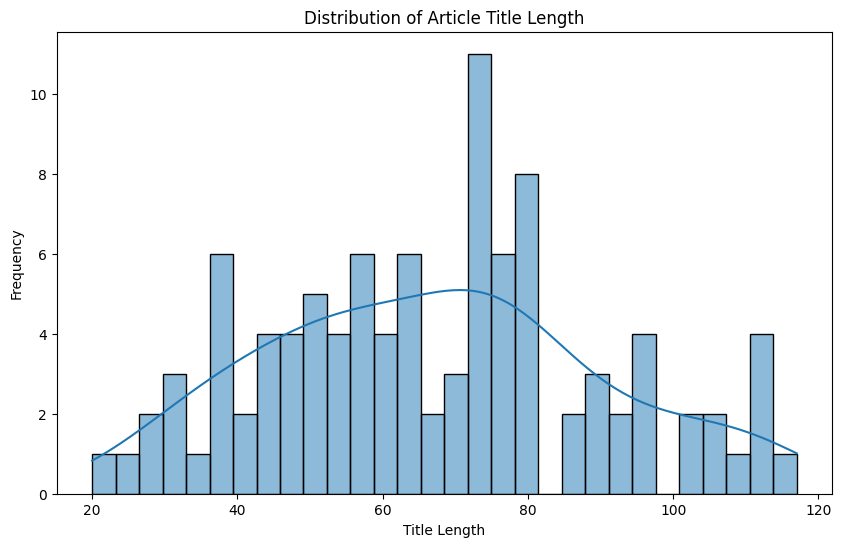

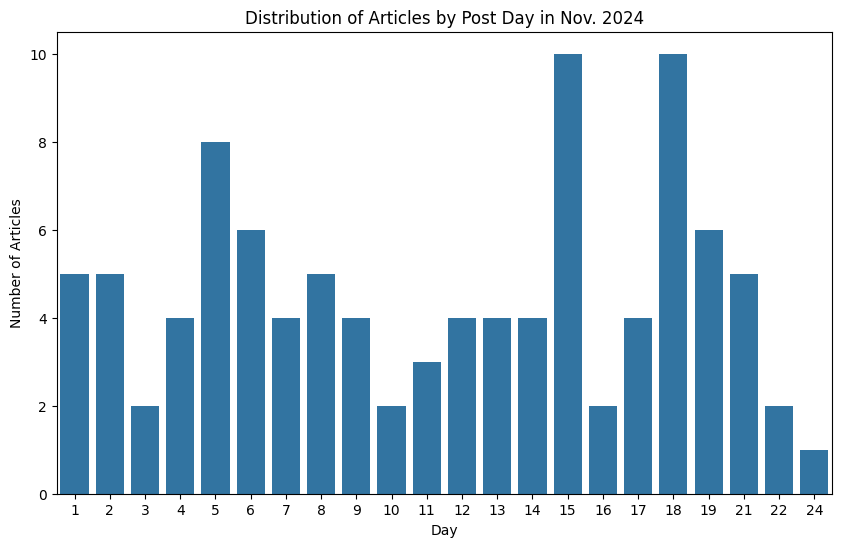

In [14]:
# Plot the distribution of articles by source
plt.figure(figsize=(12, 6))
sns.countplot(y='Source', data=news_df, order=news_df['Source'].value_counts().index)
plt.title('Distribution of Articles by Source')
plt.xlabel('Number of Articles')
plt.ylabel('Source')
plt.show()



# Plot the distribution of article title lengths
news_df['title_length'] = news_df['Title'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(news_df['title_length'], bins=30, kde=True)
plt.title('Distribution of Article Title Length')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()



# Plot the distribution of articles by post day
plt.figure(figsize=(10, 6))
sns.countplot(x='Post_Day', data=news_df)
plt.title('Distribution of Articles by Post Day in Nov. 2024')
plt.xlabel('Day')
plt.ylabel('Number of Articles')
plt.show()

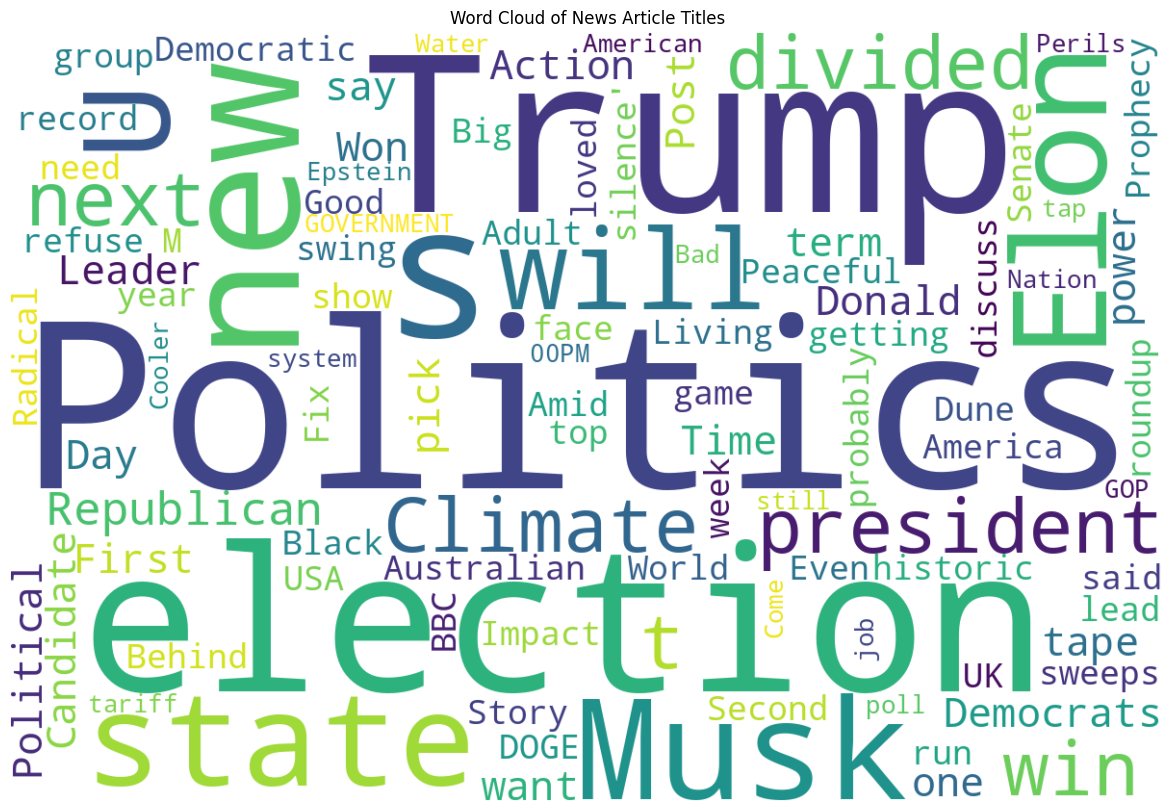

In [7]:
# Combine all titles into a single string
text = ' '.join(news_df['Title'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(
    width=1200, 
    height=800,
    background_color='white',
    max_words=100,
    collocations=False
).generate(text)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Article Titles')
plt.show()